In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
!pip install SHAP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 5.7 MB/s eta 0:00:00


In [ ]:
import sklearn
import shap
import xgboost
import lightgbm as lgb
from sklearn.model_selection import train_test_split


In [ ]:
X, y = shap.datasets.adult()
X.head()


Age  Workclass  Education-Num  Marital Status  Occupation  Relationship  \
0  39.0          7           13.0               4           1             0   
1  50.0          6           13.0               2           4             4   
2  38.0          4            9.0               0           6             0   
3  53.0          4            7.0               2           6             4   
4  28.0          4           13.0               2          10             5   

   Race  Sex  Capital Gain  Capital Loss  Hours per week  Country  
0     4    1        2174.0           0.0            40.0       39  
1     4    1           0.0           0.0            13.0       39  
2     4    1           0.0           0.0            40.0       39  
3     2    1           0.0           0.0            40.0       39  
4     2    0           0.0           0.0            40.0        5

In [ ]:
X.shape

(32561, 12)

In [ ]:
X_display, y_display = shap.datasets.adult(display=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15, random_state=8)

In [ ]:
!pip install --upgrade lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 24.9 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.1.0
    Uninstalling lightgbm-4.1.0:
      Successfully uninstalled lightgbm-4.1.0


In [ ]:
d_train = lgb.Dataset(X_train, label=y_train)
d_test = lgb.Dataset(X_test, label=y_test)
params = {
    'max_bin': 512,
    'learning_rate': 0.05,
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'num_leaves': 10
}
model = lgb.train(params, d_train, num_boost_round=10000, valid_sets=[d_test])


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6688, number of negative: 20988
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001946 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 427
[LightGBM] [Info] Number of data points in the train set: 27676, number of used features: 12
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.241653 -> initscore=-1.143636
[LightGBM] [Info] Start training from score -1.143636


In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

/usr/local/lib/python3.10/dist-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


In [ ]:
print(X.columns)

Index(['Age', 'Workclass', 'Education-Num', 'Marital Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Capital Gain', 'Capital Loss',
       'Hours per week', 'Country'],
      dtype='object')


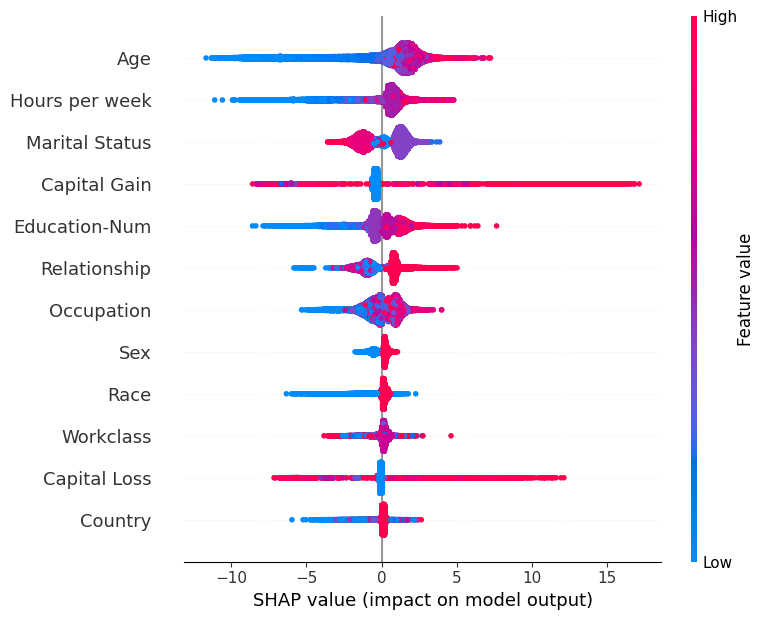

In [ ]:
shap.initjs()
shap.summary_plot(shap_values, X)

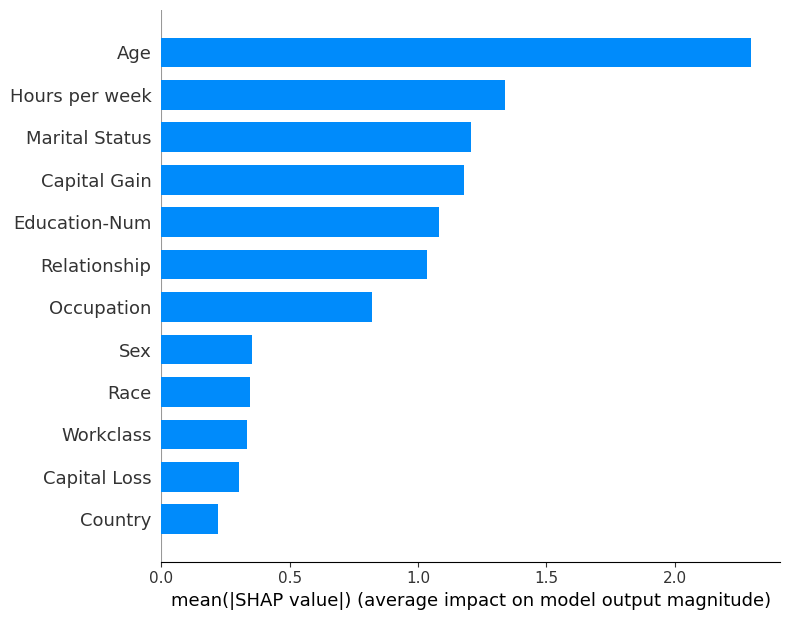

In [ ]:
shap.summary_plot(shap_values, X, plot_type="bar")

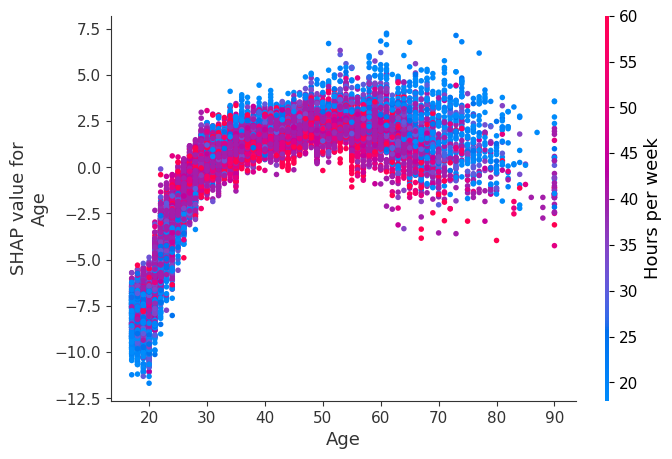

In [ ]:
shap.dependence_plot("Age", shap_values, X)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1].flatten(), X_display.iloc[0, :])

In [ ]:
import shap

# Assuming explainer and shap_values are already defined

# Make sure expected_value and shap_values are lists or arrays
expected_value = explainer.expected_value if isinstance(explainer.expected_value, (list, np.ndarray)) else [explainer.expected_value]
shap_values = shap_values if isinstance(shap_values, list) else [shap_values]

# Check if the length of expected_value and shap_values is at least 2
if len(expected_value) >= 2 and len(shap_values) >= 2:
    shap.initjs()
    shap.force_plot(expected_value[1], shap_values[1][:500, :], X_display.iloc[:500, :])
else:
    print("Insufficient data for plotting.")


Insufficient data for plotting.


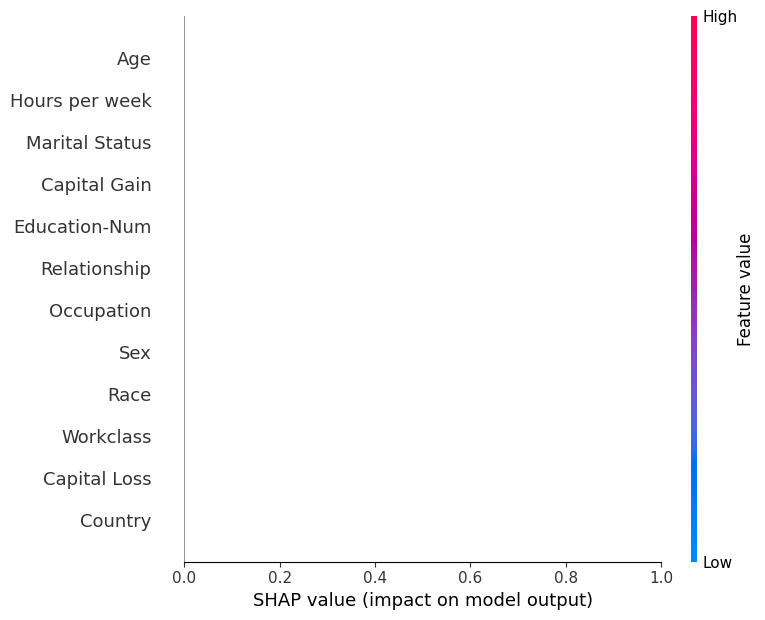

In [ ]:
shap.summary_plot(shap_values[0], X, plot_type="layered violin", color = 'coolwarm')

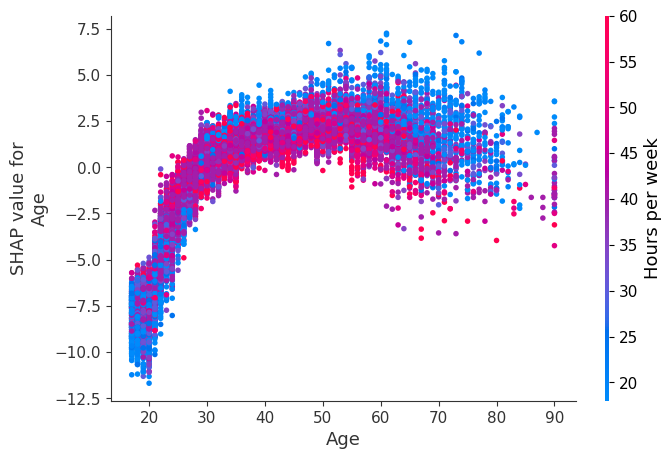

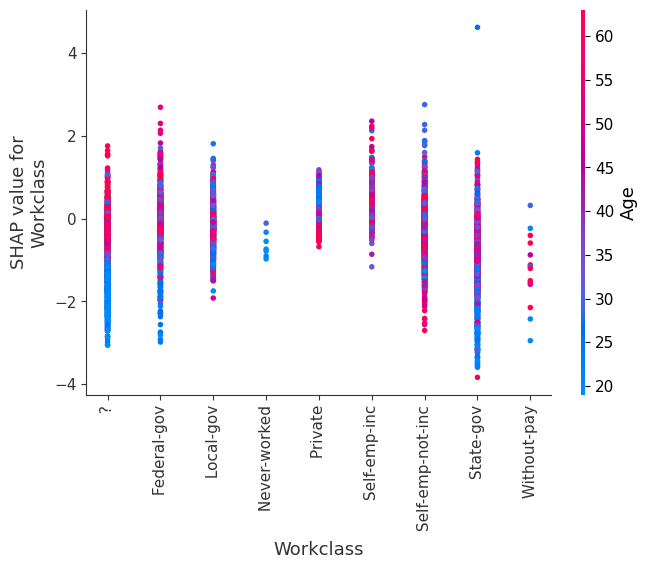

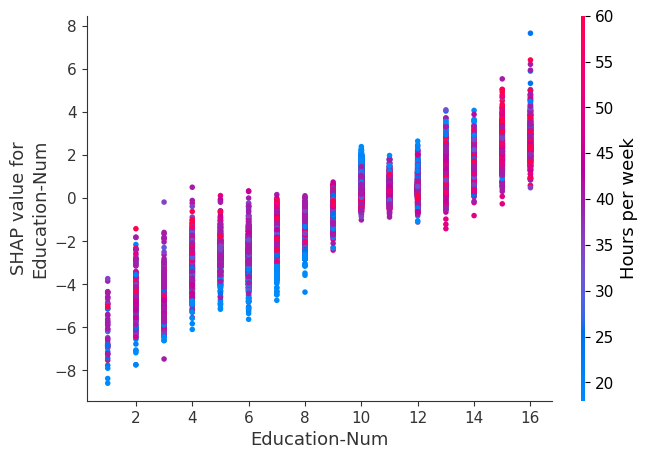

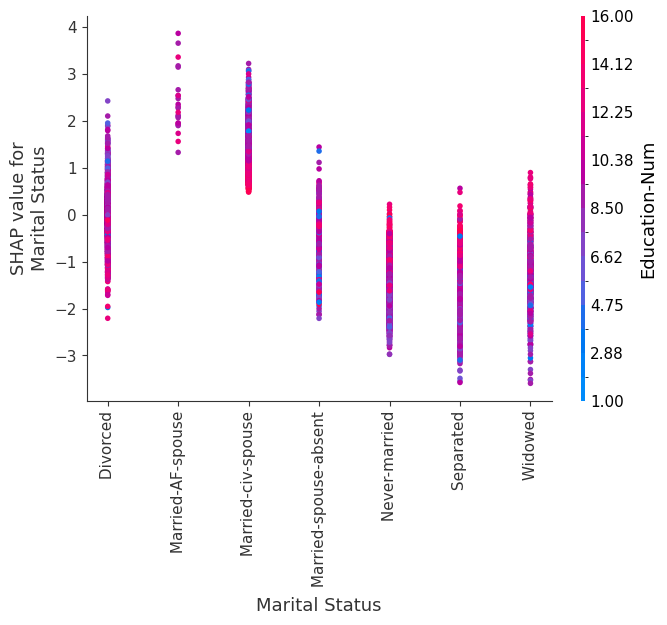

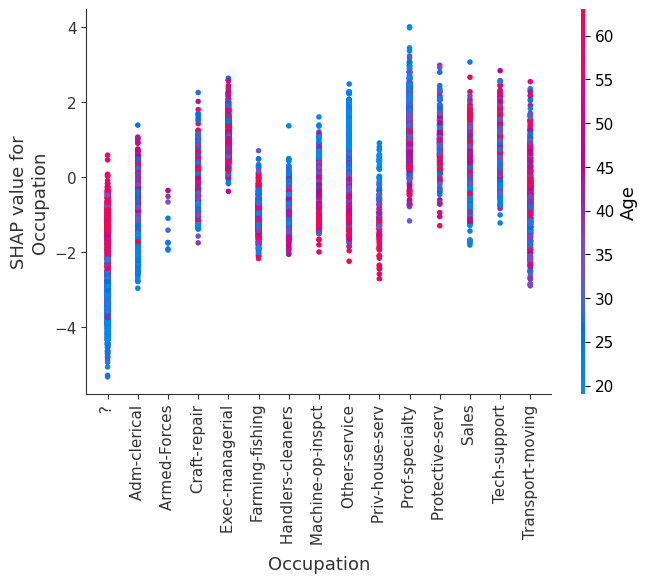

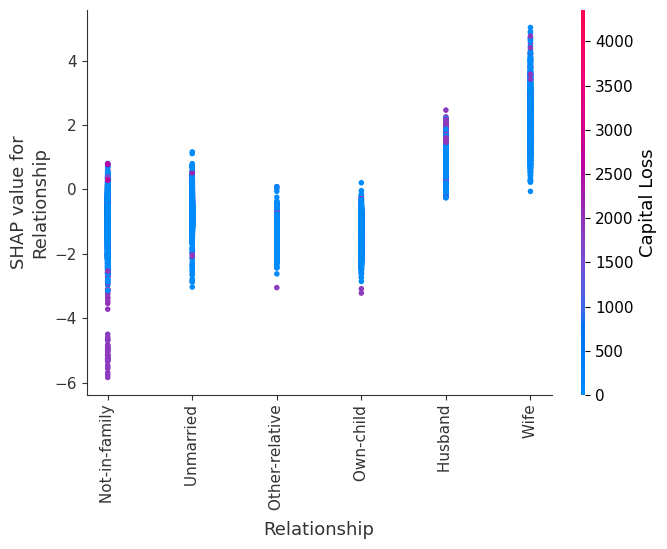

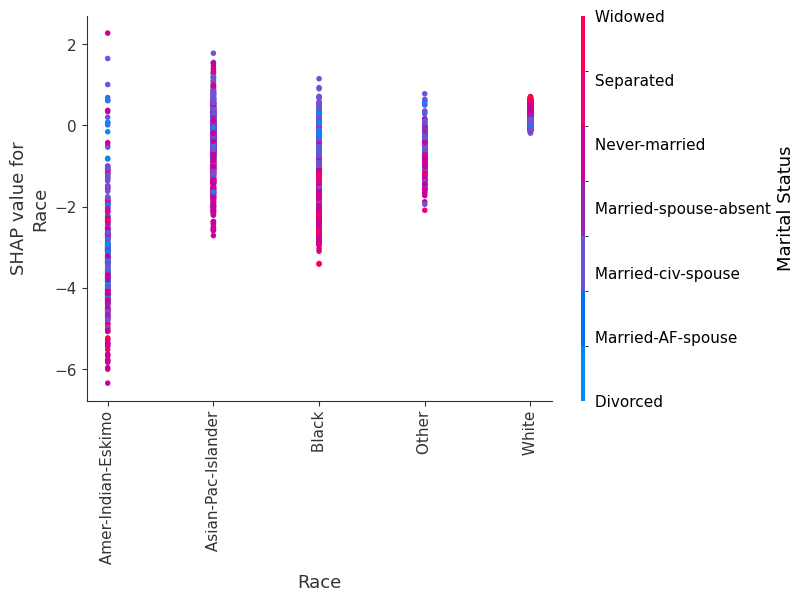

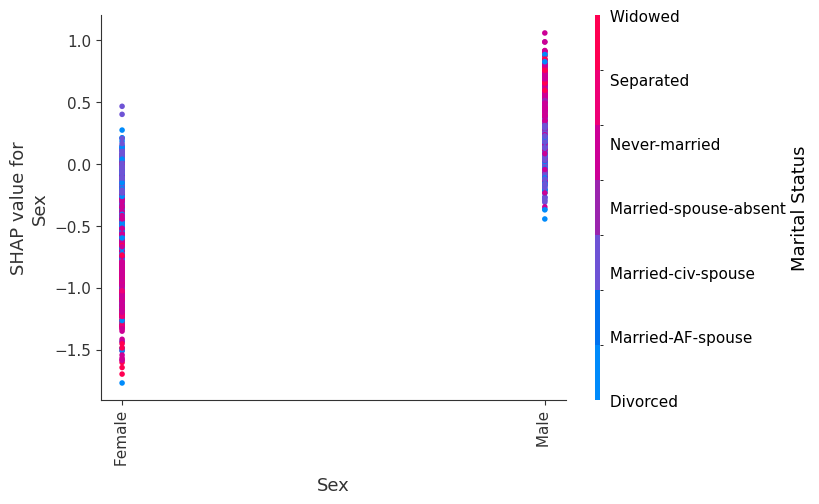

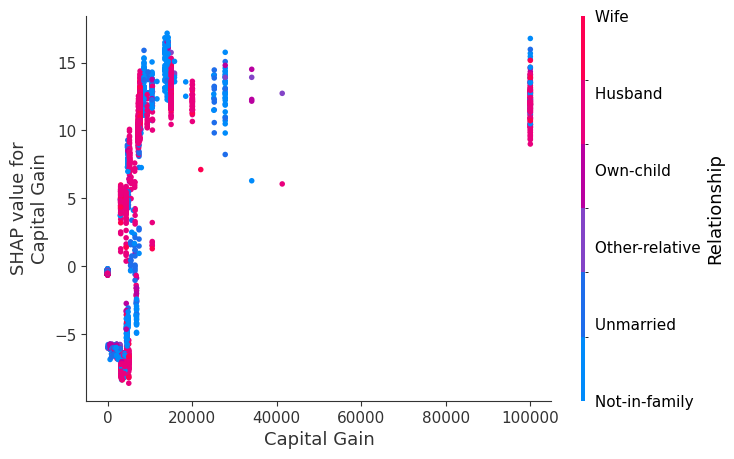

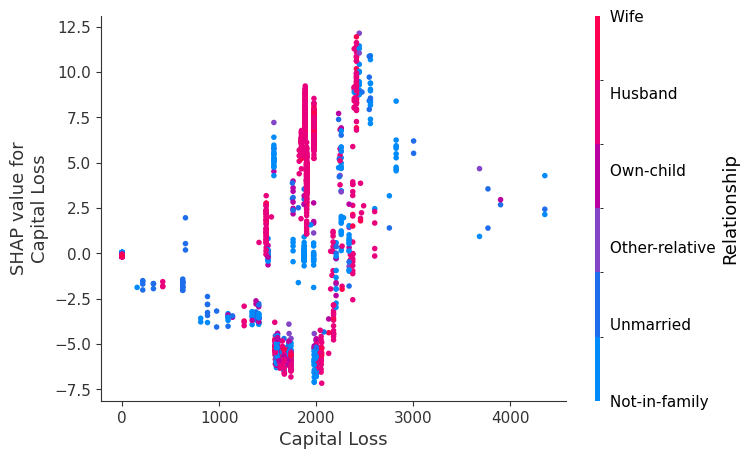

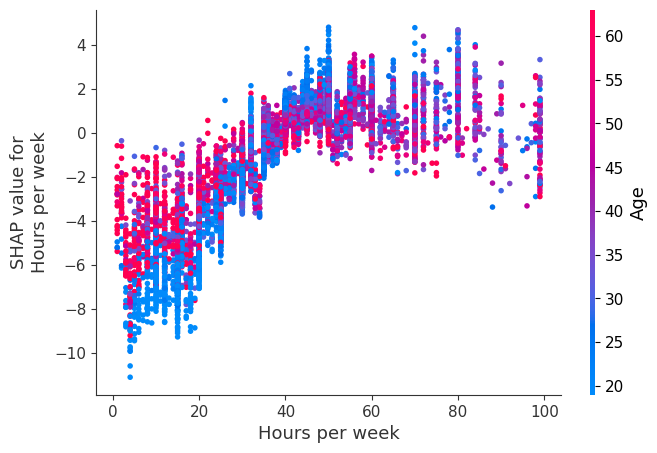

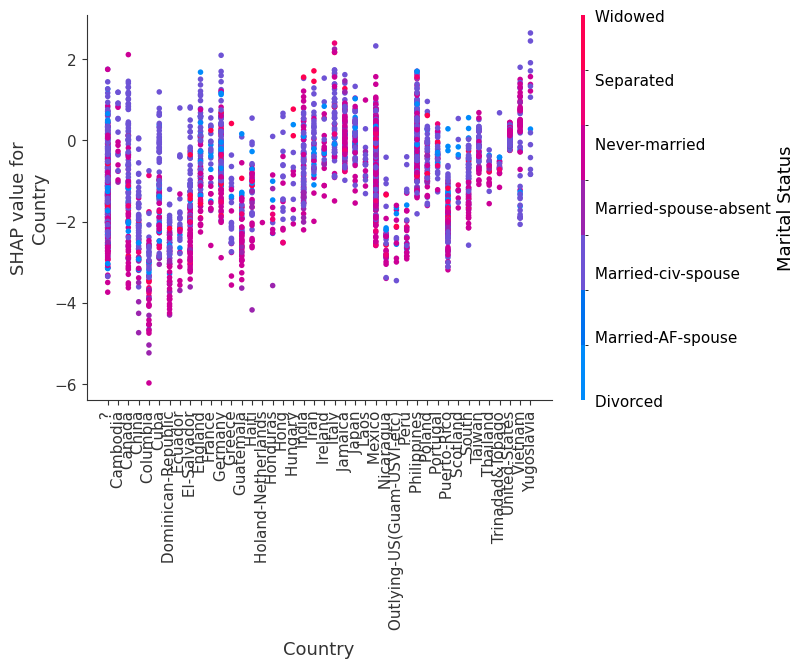

In [ ]:
shap_values_to_use = shap_values[1] if len(shap_values) > 1 else shap_values[0]

for val in X_train.columns:
    shap.dependence_plot(val, shap_values_to_use, X, display_features=X_display)

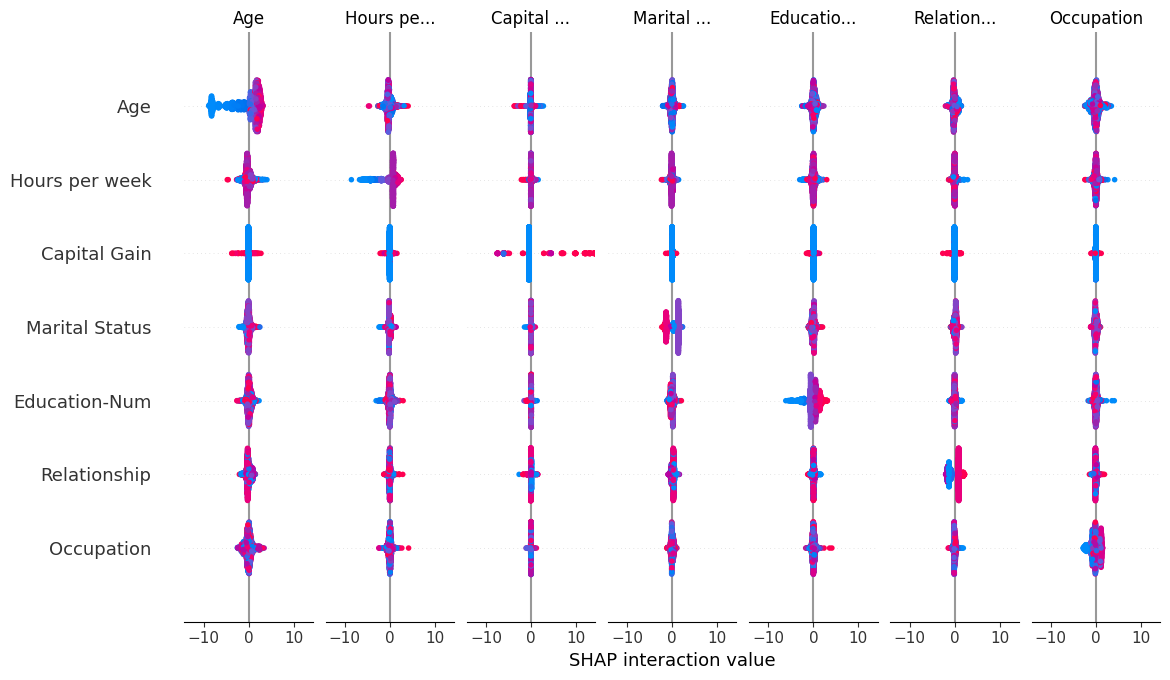

In [ ]:
shap_inter_value = shap.TreeExplainer(model).shap_interaction_values(X.iloc[:2000, :])
shap.summary_plot(shap_inter_value, X.iloc[:2000, :])

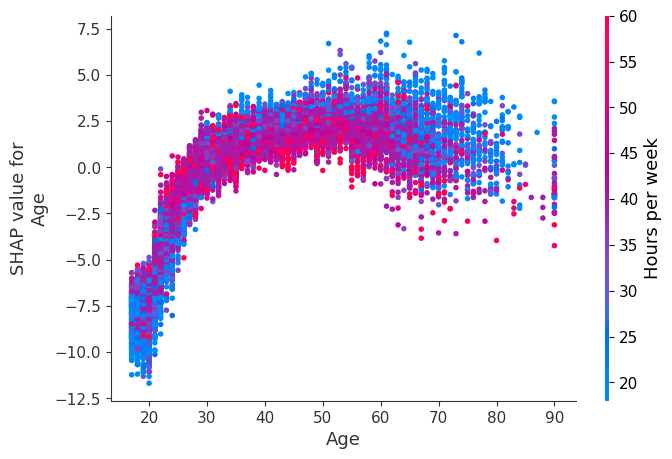

In [ ]:
shap.dependence_plot("Age", shap_values[0],X)

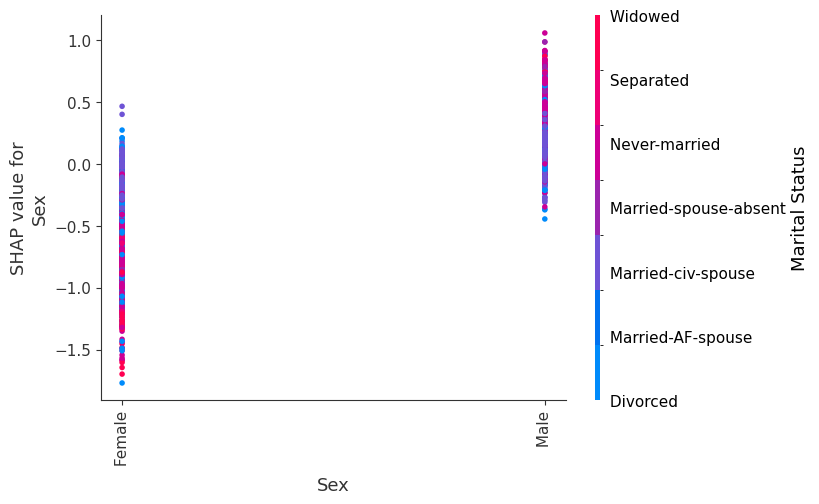

In [ ]:
shap.dependence_plot("Sex", shap_values[0], X, display_features=X_display)

In [ ]:
shap.dependence_plot(val, shap_values[0], X, display_features=X_display)

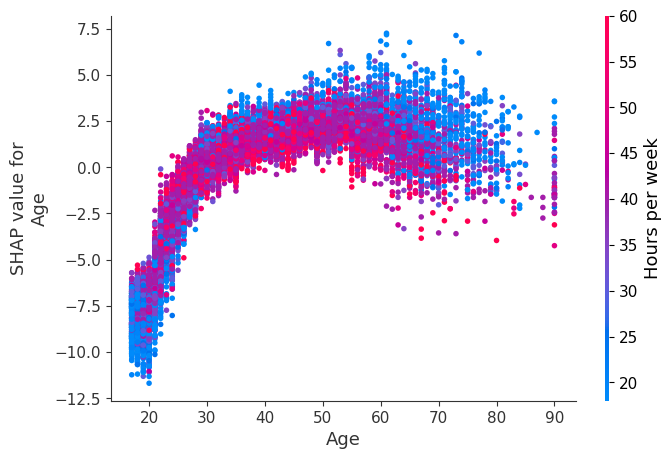

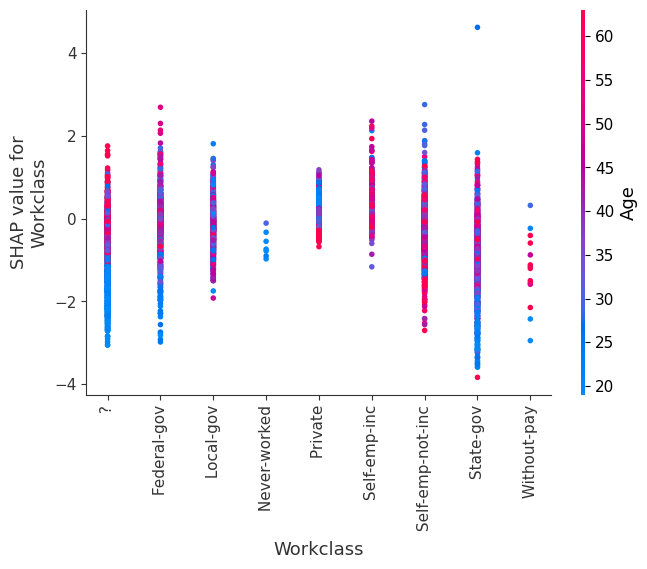

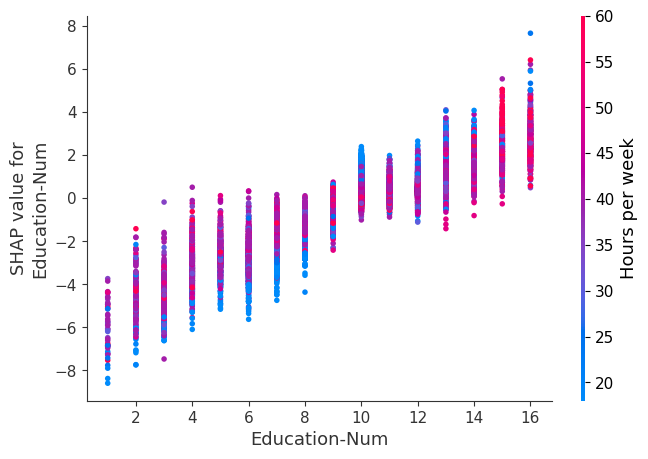

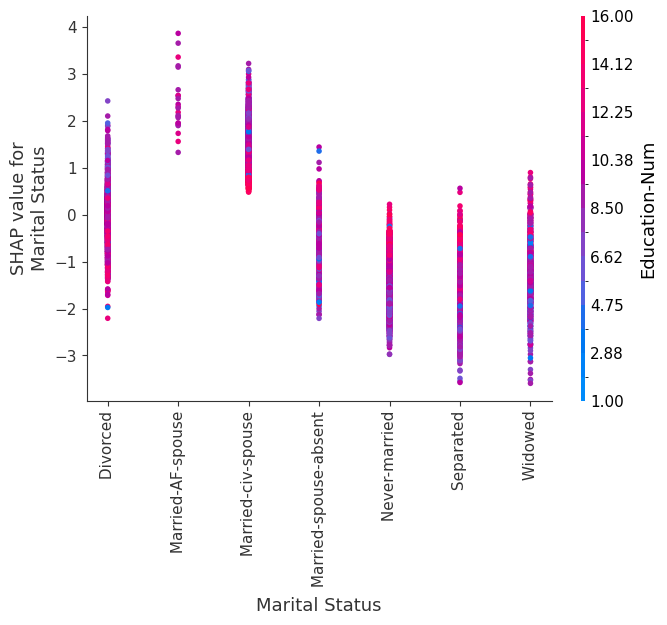

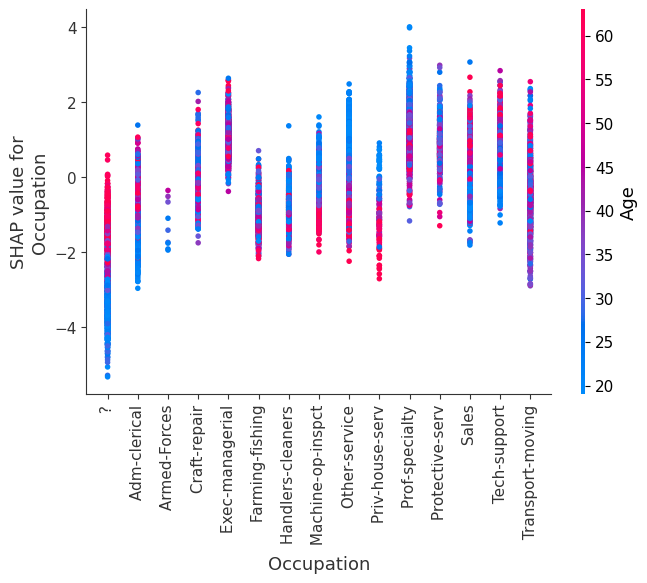

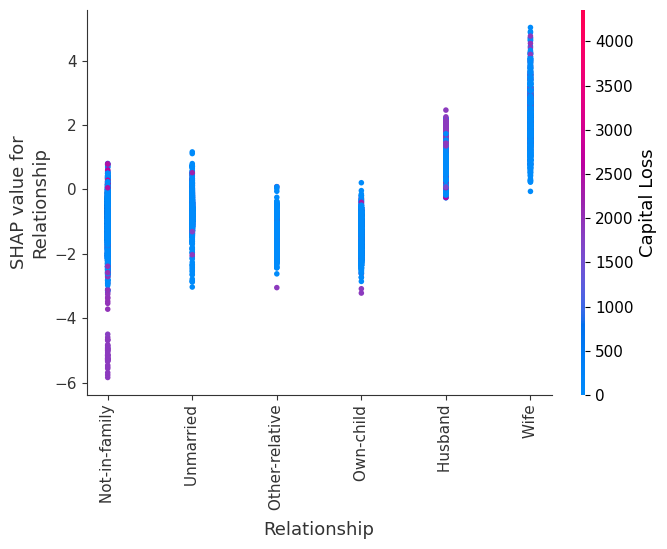

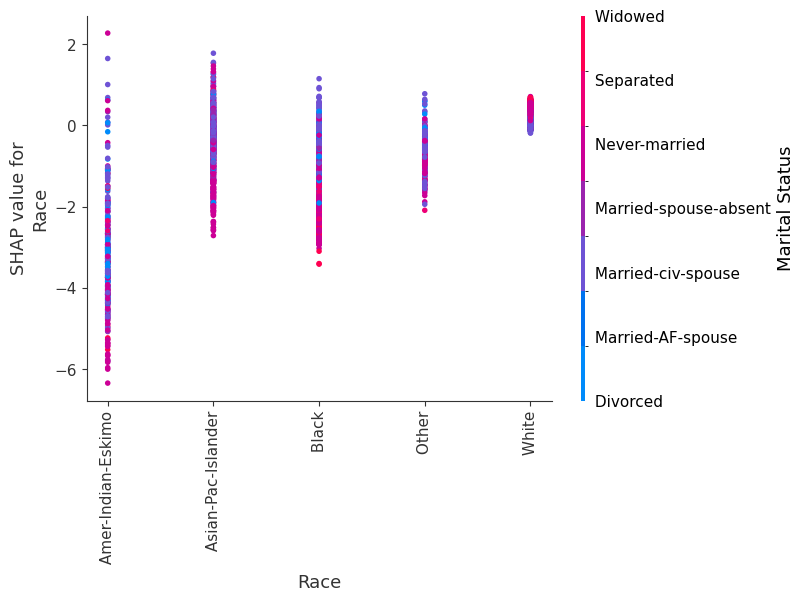

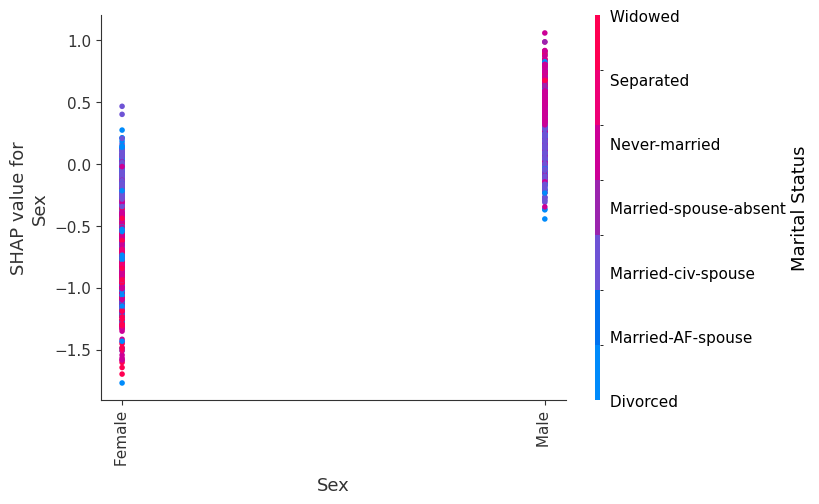

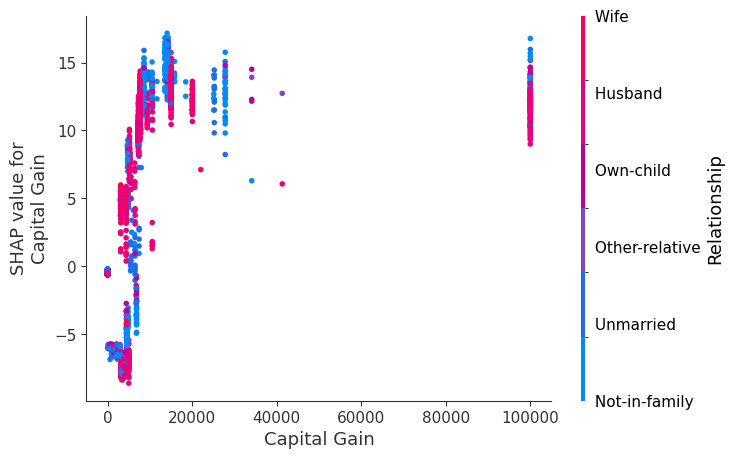

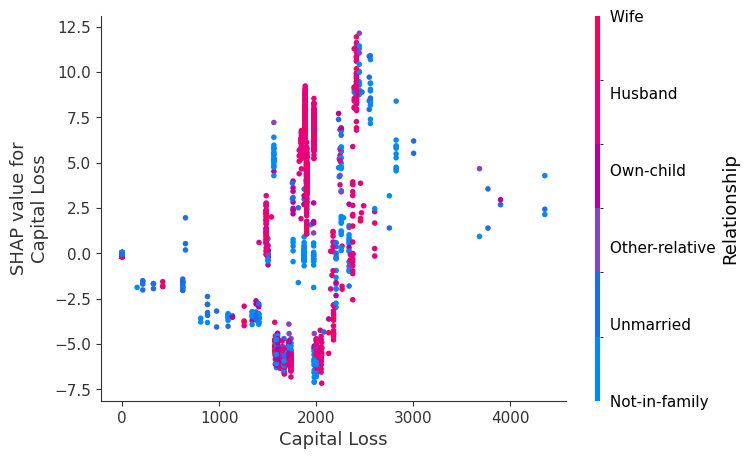

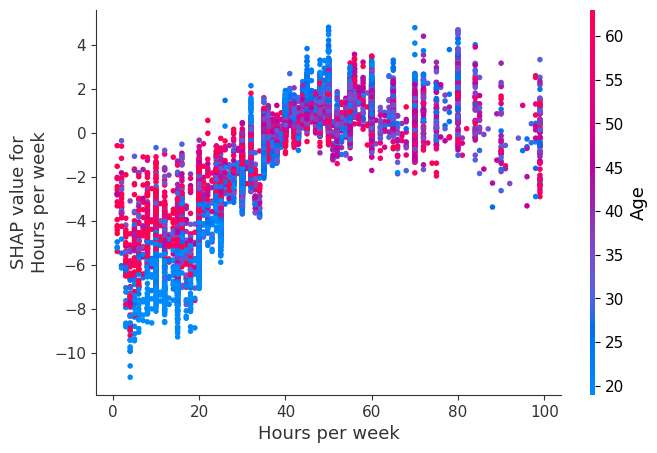

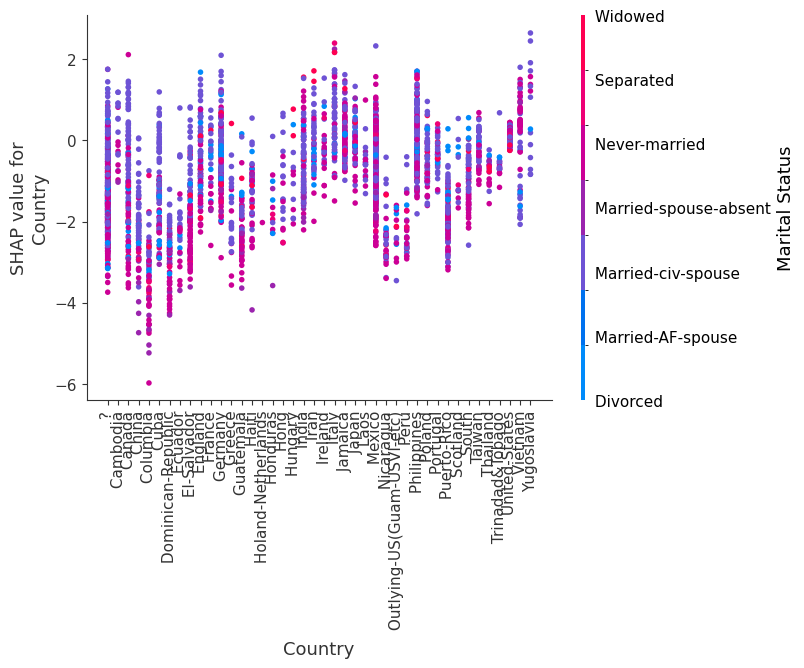

In [ ]:
for val in X_train.columns:
  shap.dependence_plot(val, shap_values[0], X, display_features=X_display)

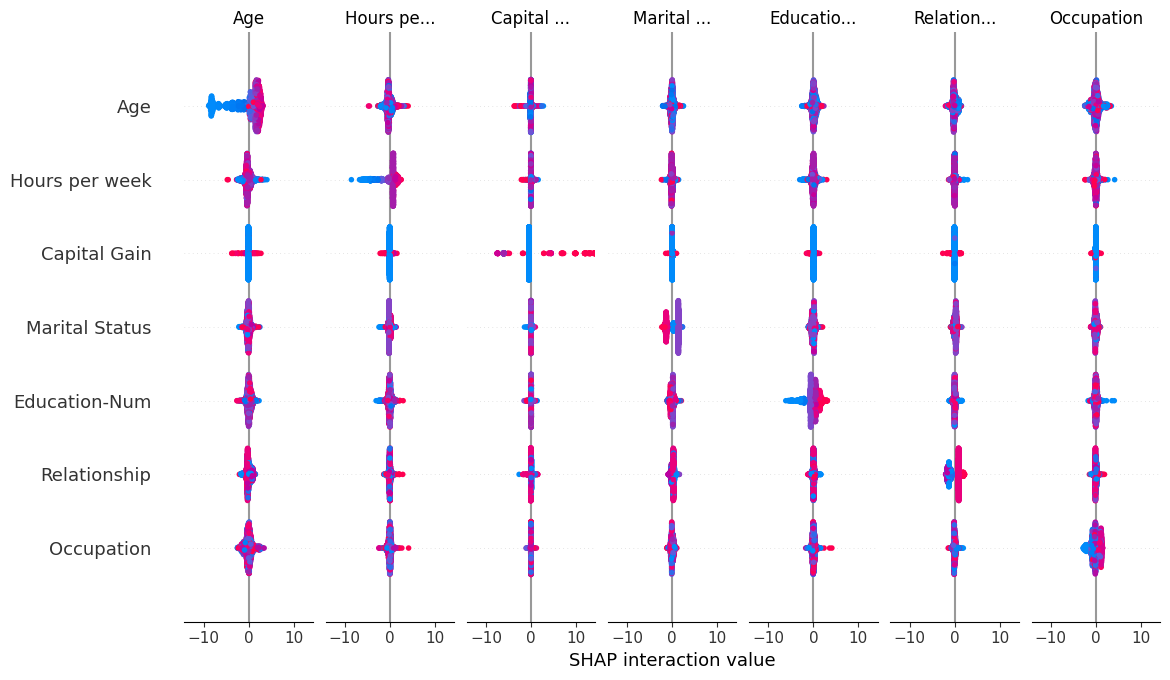

In [ ]:
shap_inter_value = shap.TreeExplainer(model).shap_interaction_values(X.iloc[:2000, :])
shap.summary_plot(shap_inter_value, X.iloc[:2000, :])

In [35]:
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
st = lambda x: knn.predict_proba(x)[:, 1]

In [40]:
med = X_train.median().values.reshape((1, X_train.shape[1]))

In [42]:
from shap import KernelExplainer

explainer1 = shap.KernelExplainer(st, med)
shap_values1 = explainer1(X_test.iloc[0:1000, :])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


  0%|          | 0/1000 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not 

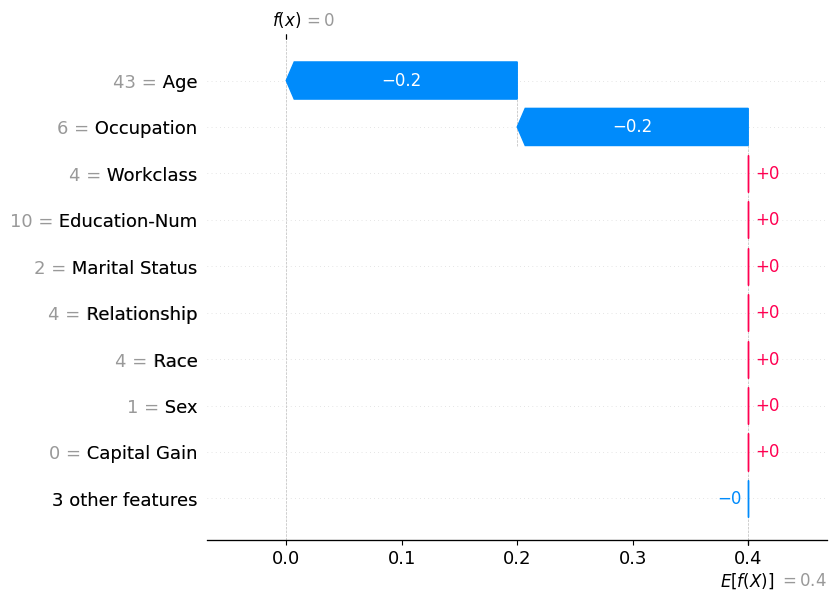

In [43]:
shap.plots.waterfall(shap_values1[0])

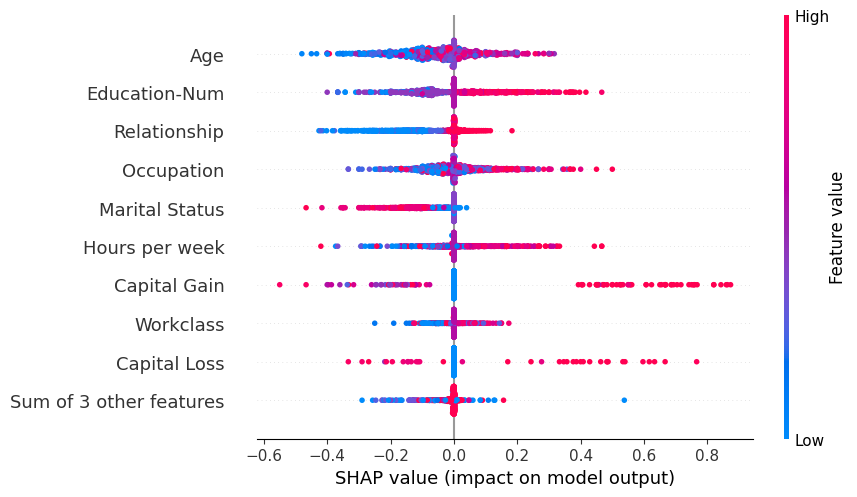

In [44]:
shap.plots.beeswarm(shap_values1)

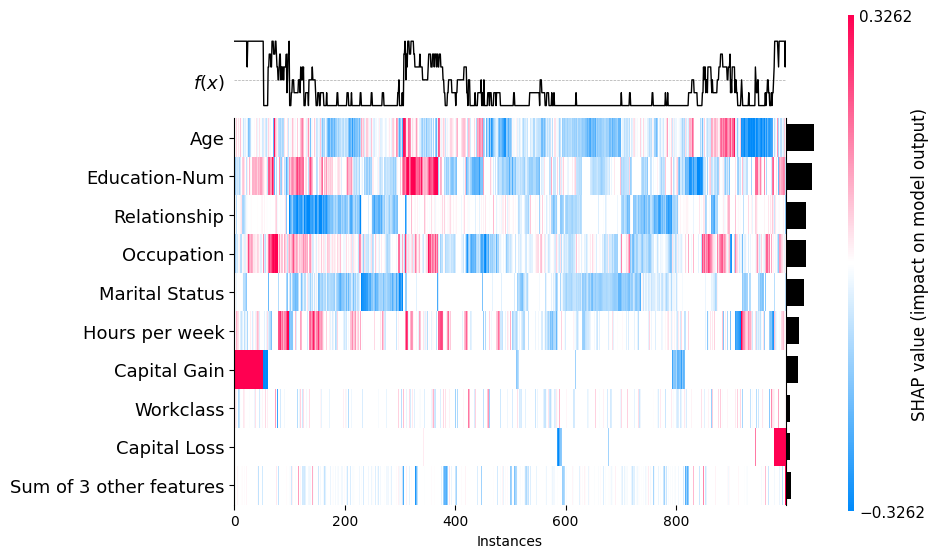

<Axes: xlabel='Instances'>

In [45]:
shap.plots.heatmap(shap_values1)

In [46]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive
